# DS4023 Assignment 3: SVM and Ensemble Learning(45 pts)

### Q1: Soft-margin SVM (9 pts)

You are given a dataset (svm_soft.mat) containing 2D points ['X'] from two classes with corresponding label (0 or 1) in column ['y']. Please visualize the datapoints and classify them using linear SVM with soft margin. You may assume that the penalty term $C$ is set to 1 in $min_{w,b} \frac{1}{2} ||w||^2+ C\sum_i \epsilon_i$.

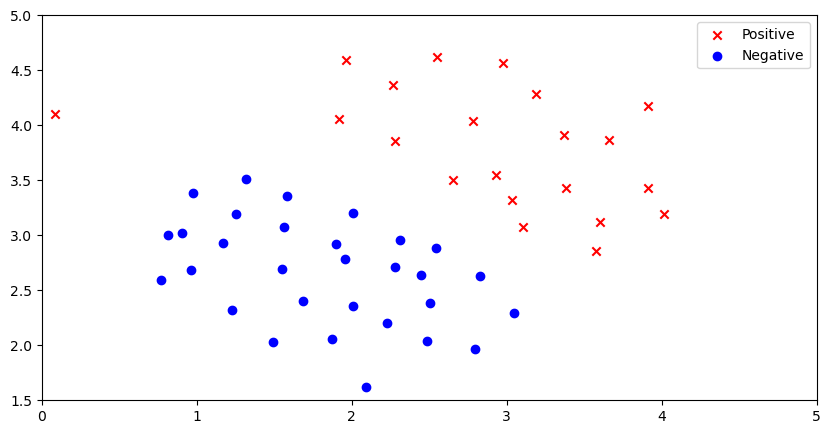

In [1]:
""" 
Part 1: Visualize the datapoints. Your plot should look similar to the sample one.
"""

import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat


# Load the data from the .mat file
data = loadmat('./data/svm_soft.mat')

# Extract features and labels
X = data['X']
y = data['y'].ravel()

# plot the data use scatter plot.
def plot_svm_soft(boundary=False, svc=None):
    plt.figure(figsize=(10, 5))
    
    # Separate the data points by class
    positive = X[y == 1]
    negative = X[y == 0]
    
    # Plot positive and negative points
    plt.scatter(positive[:, 0], positive[:, 1], color='red', marker='x', label='Positive')
    plt.scatter(negative[:, 0], negative[:, 1], color='blue', marker='o', label='Negative')
    
    # Set legend and axis limits
    plt.legend(loc='upper right')
    plt.xlim(0, 5)
    plt.ylim(1.5, 5)
    
    plt.show()



plot_svm_soft()

![sample image for data visualization](./plot.png)

Coefficients (w): [[1.40718563 2.13398052]]
Intercept (b): [-10.34889778]


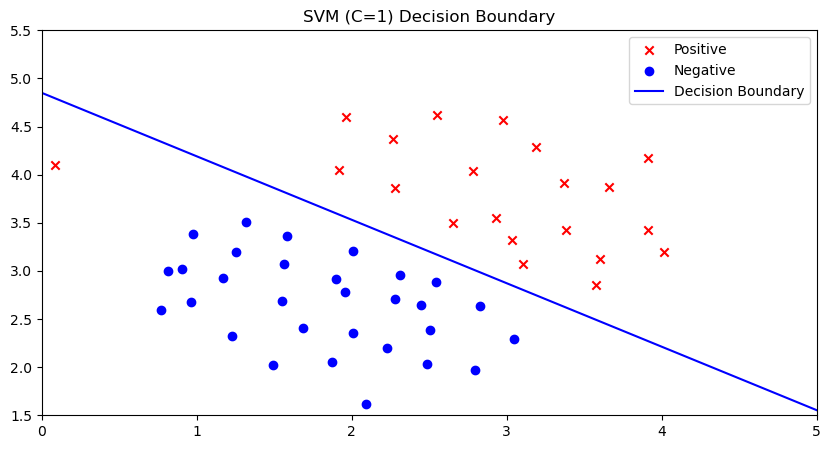

In [ ]:
""" 
Part 2: Classify the datapoints and visualize the decision boundary. 
        You should print out the coefficients and the interception for the linear classifier. 
        Your plot should look like the sample one.
"""
from sklearn import svm
import numpy as np

# Classification with linear SVM using soft margin. 

def classify_svm_soft_with_margin():
    # Initialize the linear SVM classifier with a soft margin (C=1)
    clf = svm.SVC(kernel='linear', C=1)
    
    # Fit the classifier to the data
    clf.fit(X, y)
    
    # Print the coefficients (w) and intercept (b)
    print("Coefficients (w):", clf.coef_)
    print("Intercept (b):", clf.intercept_)
    
    # Plot the data points
    plt.figure(figsize=(10, 5))
    positive = X[y == 1]
    negative = X[y == 0]
    plt.scatter(positive[:, 0], positive[:, 1], color='red', marker='x', label='Positive')
    plt.scatter(negative[:, 0], negative[:, 1], color='blue', marker='o', label='Negative')
    
    # Plot the decision boundary
    w = clf.coef_[0]
    b = clf.intercept_[0]
    x_plot = np.linspace(0, 5, 100)
    y_plot = -(w[0] * x_plot + b) / w[1]
    plt.plot(x_plot, y_plot, 'k-', label='Decision Boundary')
    
    # Plot the margin lines
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    y_margin_up = y_plot + margin
    y_margin_down = y_plot - margin
    plt.plot(x_plot, y_margin_up, 'k--', label='Margin')
    plt.plot(x_plot, y_margin_down, 'k--')
    
    # Set legend and axis limits
    plt.legend(loc='upper right')
    plt.xlim(0, 5)
    plt.ylim(1.5, 5)
    
    plt.show()


# Classification with linear SVM, showing only the decision boundary
def classify_svm_soft():
    # Initialize the linear SVM classifier with a soft margin (C=1)
    clf = svm.SVC(kernel='linear', C=1)
    # Fit the classifier to the data
    clf.fit(X, y)
    # Print the coefficients (w) and intercept (b)
    print("Coefficients (w):", clf.coef_)
    print("Intercept (b):", clf.intercept_)
    # Plot the data points
    plt.figure(figsize=(10, 5))
    positive = X[y == 1]
    negative = X[y == 0]
    plt.scatter(positive[:, 0], positive[:, 1], color='red', marker='x', label='Positive')
    plt.scatter(negative[:, 0], negative[:, 1], color='blue', marker='o', label='Negative')
    # Plot the decision boundary without margin lines
    w = clf.coef_[0]
    b = clf.intercept_[0]
    x_plot = np.linspace(0, 5, 100)
    y_plot = -(w[0] * x_plot + b) / w[1]
    plt.plot(x_plot, y_plot, 'b-', label='Decision Boundary')
    # Set plot title and limits
    plt.title("SVM (C=1) Decision Boundary")
    plt.legend(loc='upper right')
    plt.xlim(0, 5)
    plt.ylim(1.5, 5.5)
    plt.show()

classify_svm_soft()


![sample image for data visualization](./plot2.png)

### Q2: Kernel SVM (9 pts)

You are given a dataset (svm_kernel.mat) containing 2D points ['X'] from two classes with corresponding label (0 or 1) in column ['y']. Please visualize the datapoints and classify them using linear SVM with Gaussian kernel. 

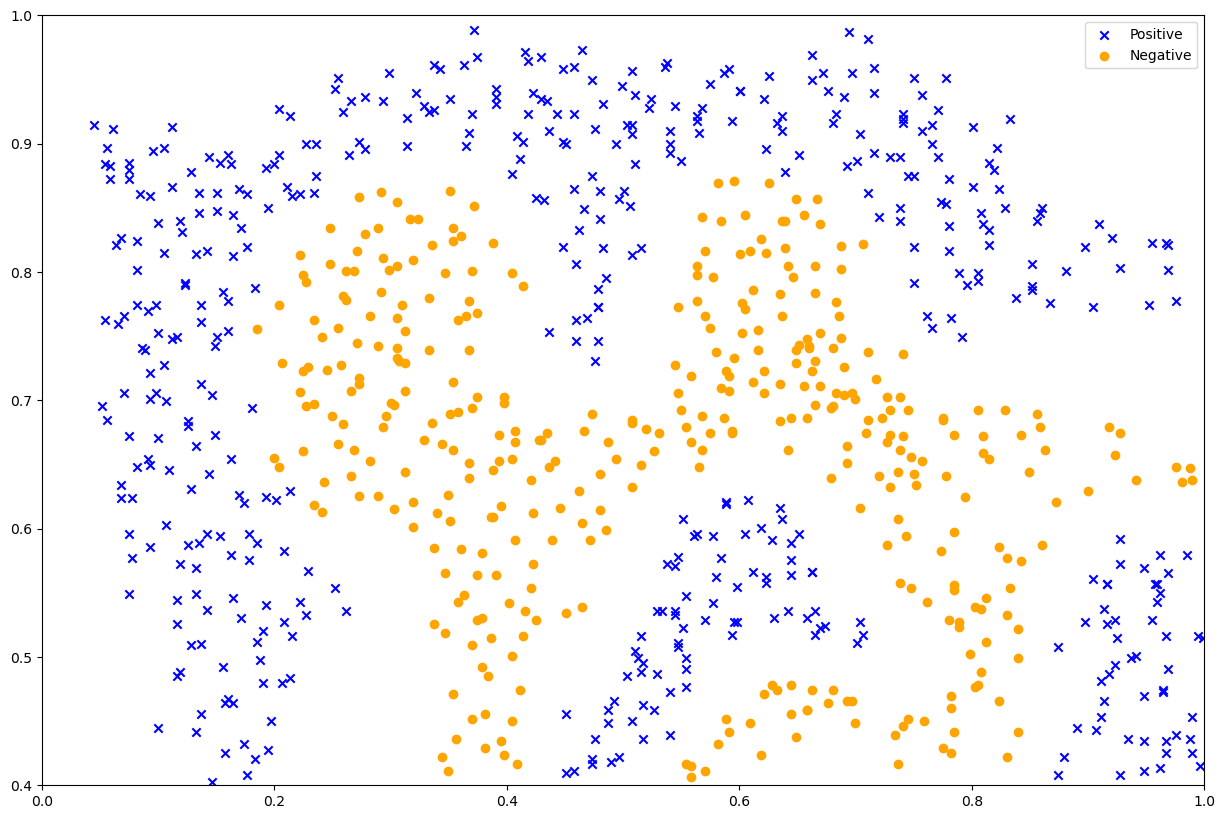

In [3]:
""" 
Part 1: Visualize the datapoints. Your plot should look similar to the sample one.
"""

import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
 
# plot the data use scatter plot.

def plot_svm_kernel():
    plt.figure(figsize=(15, 10))
    
    # Separate the data points by class
    positive = X_kernel[y_kernel == 1]
    negative = X_kernel[y_kernel == 0]
    
    # Plot positive and negative points
    plt.scatter(positive[:, 0], positive[:, 1], color='blue', marker='x', label='Positive')
    plt.scatter(negative[:, 0], negative[:, 1], color='orange', marker='o', label='Negative')
    
    # Set legend and axis limits
    plt.legend(loc='upper right')
    plt.xlim(0, 1)
    plt.ylim(0.4, 1)
    
    plt.show()

# Load the new dataset for kernel SVM
data_svm_kernel = loadmat('./data/svm_kernel.mat')

# Extract features and labels
X_kernel = data_svm_kernel['X']
y_kernel = data_svm_kernel['y'].ravel()

# Call the function to plot the data
plot_svm_kernel()

![sample image for data visualization](./plot3.png)

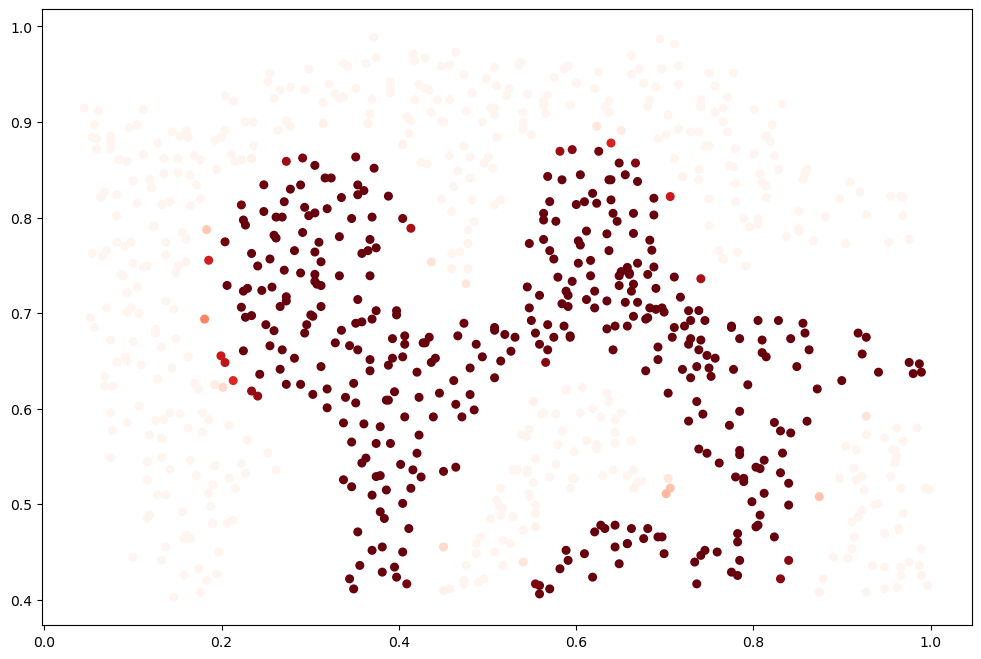

In [4]:
"""
Part 2. Classify the data points using Gaussian kernel. 
        Visualize the probabilities of the classification results.
        If your classification is correct, your plot should look similar to the sample one.
"""
def classify_svm_kernel():
    global data_svm_kernel
    # Your code here.
    # Hint: the gamma value for SVM classification is 100.
    clf = svm.SVC(kernel='rbf', gamma=100, C=1, probability=True)
    clf.fit(X_kernel, y_kernel)
    probabilities = clf.predict_proba(X_kernel)[: , 0]
    return probabilities

probabilities = classify_svm_kernel()

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X_kernel[:, 0], X_kernel[:, 1], s=30, c=probabilities, cmap='Reds')
# ax.scatter(data_svm_kernel['X1'], X_kernel['X2'], s=30, c=probabilities, cmap='Reds')

plt.show()



![sample image for data visualization](./plot4.png)

### Q3: SVM in Email Spam Detection (9 pts)

Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. Please write an SVM classifier to detect spam emails. There are two data files that you need to load, one for training, i.e., "email_train.mat", and the other for testing, i.e., "email_test.mat". Your model should train on the training dataset and be applied to the test dataset to obtain the spam detection accuracy. **Your classifier should have an accuracy higher than 90% in both training and testing. Otherwise, every 10% of accuracy decrease leads to a 2 pts deduction in marks. For example, an accuracy of [80%, 90%) will get deducted for 2 pts overall, and [70%, 80%) will get deducted for 4 pts.**

In [5]:
from sklearn.svm import SVC
from scipy.io import loadmat

# Load training and testing data for spam detection
train_data = loadmat('./data/email_train.mat')
test_data = loadmat('./data/email_test.mat')

# Extract features and labels from the training data
X_train = train_data['X']
y_train = train_data['y'].ravel()


def spam_detector_svm():
    # Load training and test data
    X = train_data['X']       # Training features
    y = train_data['y'].ravel()  # Training labels
    Xtest = test_data['Xtest']   # Test features
    ytest = test_data['ytest'].ravel()  # Test labels

    # Initialize the SVM classifier with a linear kernel
    svc = SVC(kernel='linear', C=1)

    # Train the classifier on the training data
    svc.fit(X, y)

    # Do not remove these lines
    print('Training accuracy = {0}%'.format(np.round(svc.score(X, y) * 100, 2)))
    print('Test accuracy = {0}%'.format(np.round(svc.score(Xtest, ytest) * 100, 2)))


spam_detector_svm()


Training accuracy = 99.98%
Test accuracy = 97.8%


### Q4: Bagging (9 pts)

You are given a tumor dataset `tumor.csv`. The dataset contains instances with 9 features. Each instance is labeled in either benign or malignant classes (0 for benign, 1 for malignant in last column). The dataset only contains numeric values and has been normalized. Use ``RandomForestClassifier`` to calculate the mean accuracy by using 8-folds cross-validation. Number of trees set to 50.

In [6]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
tumor_data = pd.read_csv('./data/tumor.csv')

# Separate features and target labels
X_tumor = tumor_data.iloc[:, :-1]
y_tumor = tumor_data.iloc[:, -1]

def classify_bagging():
    rand_seed = 50  # Do not change
    # Initialize the RandomForestClassifier with 50 trees and set the random state for reproducibility
    rf_classifier = RandomForestClassifier(n_estimators=50, random_state=rand_seed)
    
    # Perform 8-fold cross-validation and calculate mean accuracy
    results = model_selection.cross_val_score(rf_classifier, X_tumor, y_tumor, cv=8)
    
    # Do not remove this line
    print("Performance of random forest:%f"% (results.mean()))


# Run the function to see the performance of the random forest
classify_bagging()


Performance of random forest:0.965713


### Q5: AdaBoost (9 pts)

Use AdaBoostClassifier to classify the same dataset `tumor.csv`. Compute the mean accuracy by using 8-folds cross-validation and 50 estimators.

In [7]:
from sklearn.ensemble import AdaBoostClassifier

def classify_adaboost():
    rand_seed = 50  # Do not change
    
    # Initialize the AdaBoostClassifier with 50 estimators, using SAMME algorithm
    ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=rand_seed, algorithm="SAMME")
        
    # Perform 8-fold cross-validation and calculate mean accuracy
    results = model_selection.cross_val_score(ada_classifier, X_tumor, y_tumor, cv=8)
    
    # Do not remove this line
    print("Performance of adaboost:%f"% (results.mean()))

# Run the function to see the performance of the AdaBoost classifier
classify_adaboost()


Performance of adaboost:0.954333
